In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Importing the required libraries for data manipulation and analysis
import pandas as pd

# Loading the uploaded dataset into a Pandas DataFrame
file_path = 'ionosphere_cleaned.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()


Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0          1          0    0.99539   -0.05889    0.85243    0.02306   
1          1          0    1.00000   -0.18829    0.93035   -0.36156   
2          1          0    1.00000   -0.03365    1.00000    0.00485   
3          1          0    1.00000   -0.45161    1.00000    1.00000   
4          1          0    1.00000   -0.02401    0.94140    0.06531   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_26  Feature_27  \
0    0.83398   -0.37708    1.00000     0.03760  ...    -0.51171     0.41078   
1   -0.10868   -0.93597    1.00000    -0.04549  ...    -0.26569    -0.20468   
2    1.00000   -0.12062    0.88965     0.01198  ...    -0.40220     0.58984   
3    0.71216   -1.00000    0.00000     0.00000  ...     0.90695     0.51613   
4    0.92106   -0.23255    0.77152    -0.16399  ...    -0.65158     0.13290   

   Feature_28  Feature_29  Feature_30  Feature_31  Feature_32  Feature_33  \
0    -0.46168     0.21266    -0.34090     0.42267    -0.54487     0.18641   
1    -0.18401    -0.19040    -0.11593    -0.16626    -0.06288    -0.13738   
2    -0.22145     0.43100    -0.17365     0.60436    -0.24180     0.56045   
3     1.00000     1.00000    -0.20099     0.25682     1.00000    -0.32382   
4    -0.53206     0.02431    -0.62197    -0.05707    -0.59573    -0.04608   

   Feature_34  Label  
0    -0.45300      g  
1    -0.02447      b  
2    -0.38238      g  
3     1.00000      b  
4    -0.65697      g  

[5 rows x 35 columns]

In [ ]:
# Check for null values in the dataset
nullcount = df.isnull().sum()
nullcount


In [ ]:
# no null values found 

In [4]:
# label encoding 
from sklearn.preprocessing import LabelEncoder

# Create a new DataFrame to store the encoded data
encodedframe = df.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Identify categorical columns and perform label encoding
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        encodedframe[column] = label_encoder.fit_transform(df[column])

# Show the first few rows of the new DataFrame with encoded labels
encodedframe.head()


Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0          1          0    0.99539   -0.05889    0.85243    0.02306   
1          1          0    1.00000   -0.18829    0.93035   -0.36156   
2          1          0    1.00000   -0.03365    1.00000    0.00485   
3          1          0    1.00000   -0.45161    1.00000    1.00000   
4          1          0    1.00000   -0.02401    0.94140    0.06531   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_26  Feature_27  \
0    0.83398   -0.37708    1.00000     0.03760  ...    -0.51171     0.41078   
1   -0.10868   -0.93597    1.00000    -0.04549  ...    -0.26569    -0.20468   
2    1.00000   -0.12062    0.88965     0.01198  ...    -0.40220     0.58984   
3    0.71216   -1.00000    0.00000     0.00000  ...     0.90695     0.51613   
4    0.92106   -0.23255    0.77152    -0.16399  ...    -0.65158     0.13290   

   Feature_28  Feature_29  Feature_30  Feature_31  Feature_32  Feature_33  \
0    -0.46168     0.21266    -0.34090     0.42267    -0.54487     0.18641   
1    -0.18401    -0.19040    -0.11593    -0.16626    -0.06288    -0.13738   
2    -0.22145     0.43100    -0.17365     0.60436    -0.24180     0.56045   
3     1.00000     1.00000    -0.20099     0.25682     1.00000    -0.32382   
4    -0.53206     0.02431    -0.62197    -0.05707    -0.59573    -0.04608   

   Feature_34  Label  
0    -0.45300      1  
1    -0.02447      0  
2    -0.38238      1  
3     1.00000      0  
4    -0.65697      1  

[5 rows x 35 columns]

In [ ]:
# The label encoding has been successfully applied to the categorical features in the dataset. Specifically, 
#the Label column has been encoded: 'g' is mapped to 1 and 'b' is mapped to 0. 
# This encoded data is stored in a new DataFrame called df_encoded.

In [5]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) variables
X = encodedframe.drop('Label', axis=1)
y = encodedframe['Label']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((280, 34), (70, 34), (280,), (70,))

In [ ]:
# RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)

# Initialize RFE (Recursive Feature Elimination) with the classifier and number of features to select
rfe = RFE(estimator=classifier, n_features_to_select=1, step=1)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rfe.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Get the ranking of features based on RFE
feature_ranking = rfe.ranking_

# Create a DataFrame to show the feature ranking
feature_ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': feature_ranking})

# Sort the DataFrame based on the ranking
sorted_feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

# Display the sorted DataFrame and the accuracy
sorted_feature_ranking_df, accuracy


In [ ]:
 # 4    Feature_5        1
 # 26  Feature_27        2
 # 3    Feature_4        3
 # 2    Feature_3        4
 # 11  Feature_12        5
 # 23  Feature_24        6
 # 16  Feature_17        7
 # 15  Feature_16        8
 # 21  Feature_22        9
 # 25  Feature_26       10

In [ ]:
# ranking values , 1-10 as they are more relevant for predicting the target variable in this case.

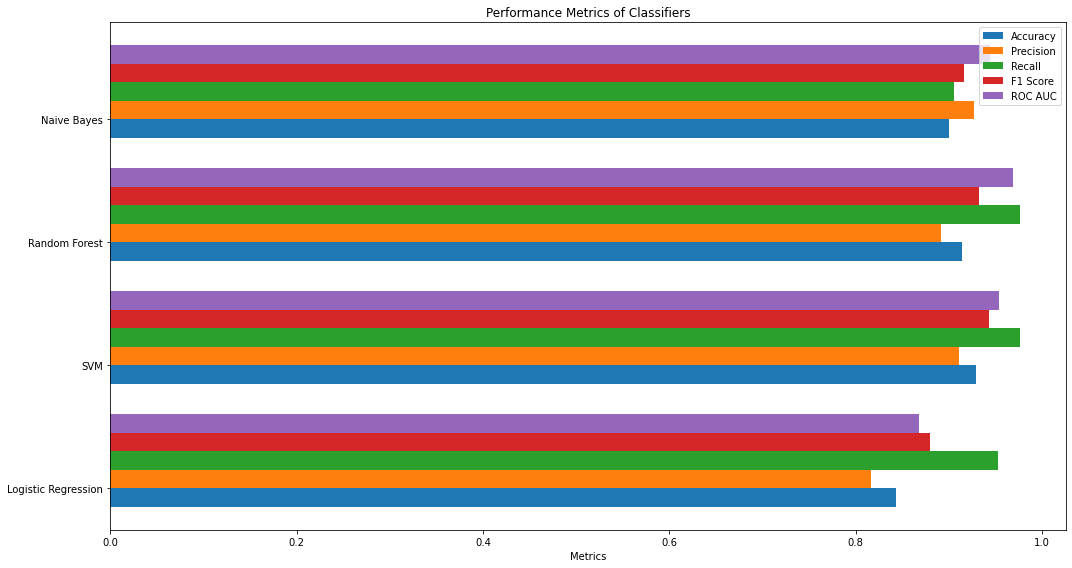

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.842857   0.816327  0.952381  0.879121  0.868197
1                  SVM  0.928571   0.911111  0.976190  0.942529  0.953231
2        Random Forest  0.914286   0.891304  0.976190  0.931818  0.968963
3          Naive Bayes  0.900000   0.926829  0.904762  0.915663  0.943878

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Select top 10 important features based on RFE ranking
top_features = sorted_feature_ranking_df['Feature'].head(10).values
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Initialize dictionary to store performance metrics
RFEPM = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Train classifiers and evaluate performance
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_top, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_top)
    y_prob = clf.predict_proba(X_test_top)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store performance metrics
    RFEPM['Classifier'].append(name)
    RFEPM['Accuracy'].append(accuracy)
    RFEPM['Precision'].append(precision)
    RFEPM['Recall'].append(recall)
    RFEPM['F1 Score'].append(f1)
    RFEPM['ROC AUC'].append(roc_auc)

# Create a DataFrame to display performance metrics
performance_df = pd.DataFrame(RFEPM)

# Plotting the performance metrics
labels = RFEPM['Classifier']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 8))

for i, metric in enumerate(metrics):
    ax.barh(x + i * width, RFEPM[metric], width, label=metric)

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics of Classifiers')
ax.set_yticks(x + width / 2)
ax.set_yticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Show the performance metrics DataFrame
performance_df


In [ ]:
    # SVM has the highest metrics across all categories except ROC AUC, where Random Forest leads.
    # Random Forest and Naive Bayes also perform well, with only slightly lower metrics compared to SVM.
    # Logistic Regression performs well but has slightly lower metrics compared to the other models.

In [ ]:
# For all features 

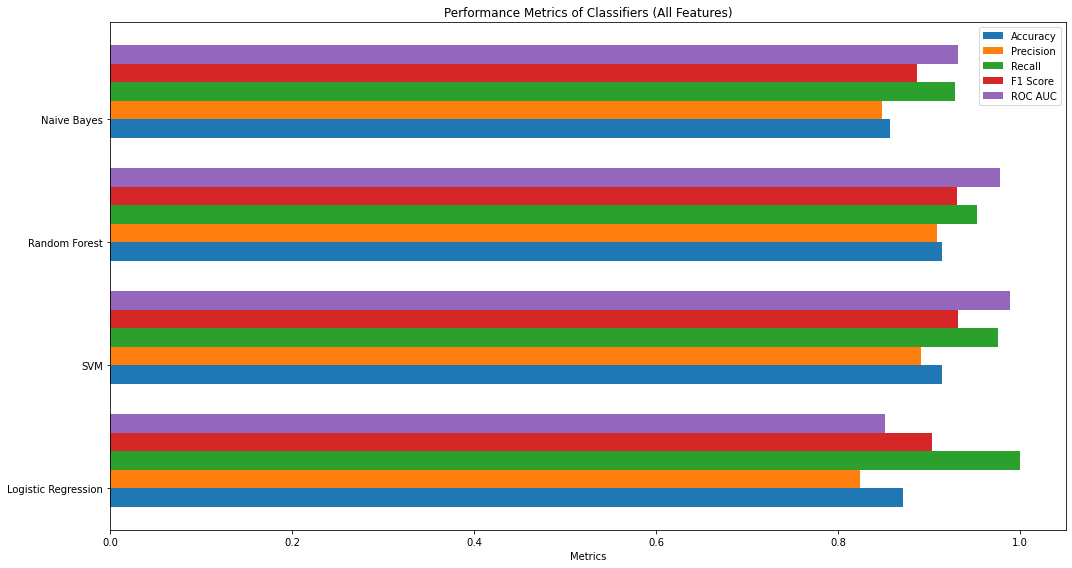

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.871429   0.823529  1.000000  0.903226  0.851190
1                  SVM  0.914286   0.891304  0.976190  0.931818  0.988946
2        Random Forest  0.914286   0.909091  0.952381  0.930233  0.978316
3          Naive Bayes  0.857143   0.847826  0.928571  0.886364  0.931973

In [8]:
# Initialize dictionary to store performance metrics for all features
allfeaturespm = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Train classifiers and evaluate performance using all features
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store performance metrics
    allfeaturespm['Classifier'].append(name)
    allfeaturespm['Accuracy'].append(accuracy)
    allfeaturespm['Precision'].append(precision)
    allfeaturespm['Recall'].append(recall)
    allfeaturespm['F1 Score'].append(f1)
    allfeaturespm['ROC AUC'].append(roc_auc)

# Create a DataFrame to display performance metrics for all features
performance_df_all_features = pd.DataFrame(allfeaturespm)

# Plotting the performance metrics for all features
labels = allfeaturespm['Classifier']

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 8))

for i, metric in enumerate(metrics):
    ax.barh(x + i * width, allfeaturespm[metric], width, label=metric)

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics of Classifiers (All Features)')
ax.set_yticks(x + width / 2)
ax.set_yticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Show the performance metrics DataFrame for all features
performance_df_all_features


In [ ]:
    # Random Forest has the highest metrics for Accuracy, Precision, and F1 Score, as well as the second-highest for ROC AUC.
    # SVM performs extremely well, especially in terms of ROC AUC.
    # Logistic Regression and Naive Bayes also perform well but have slightly lower metrics compared to the other models.

In [ ]:
# Forward Selection

In [9]:
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize the SVM classifier
svmclf = SVC(probability=True)

# Initialize Forward Selection with the classifier and number of features to select
forward_selector = SequentialFeatureSelector(estimator=svmclf, n_features_to_select=10, direction='forward')

# Fit Forward Selection on the training data
forward_selector = forward_selector.fit(X_train, y_train)

# Get the mask of selected features
selected_features_mask = forward_selector.get_support()

# Create a DataFrame to show the selected features
selected_features_df = pd.DataFrame({'Feature': X_train.columns, 'Selected': selected_features_mask})

# Get the names of selected features based on the mask
selectedfeatures = X_train.columns[selected_features_mask]

# Display the selected features
selectedfeatures


Index(['Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6',
       'Feature_8', 'Feature_15', 'Feature_21', 'Feature_25', 'Feature_32'],
      dtype='object')

In [ ]:
#     Feature_2
#     Feature_3
#     Feature_4
#     Feature_5
#     Feature_6
#     Feature_8
#     Feature_15
#     Feature_21
#     Feature_25
#     Feature_32



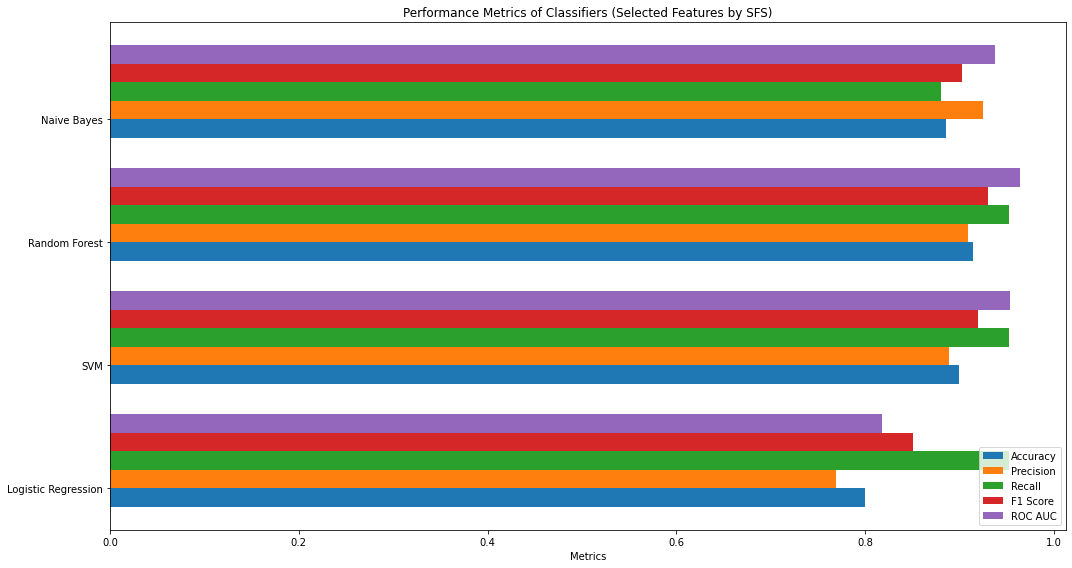

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.800000   0.769231  0.952381  0.851064  0.818027
1                  SVM  0.900000   0.888889  0.952381  0.919540  0.953231
2        Random Forest  0.914286   0.909091  0.952381  0.930233  0.964286
3          Naive Bayes  0.885714   0.925000  0.880952  0.902439  0.937925

In [10]:
# Initialize dictionary to store performance metrics for selected features by Forward Selection
sfspm = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Extract the training and testing sets for the selected features
X_train_sfs = X_train[selected_features_names]
X_test_sfs = X_test[selected_features_names]

# Train classifiers and evaluate performance using selected features
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_sfs, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_sfs)
    y_prob = clf.predict_proba(X_test_sfs)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store performance metrics
    sfspm['Classifier'].append(name)
    sfspm['Accuracy'].append(accuracy)
    sfspm['Precision'].append(precision)
    sfspm['Recall'].append(recall)
    sfspm['F1 Score'].append(f1)
    sfspm['ROC AUC'].append(roc_auc)

# Create a DataFrame to display performance metrics for selected features
performance_df_sfs = pd.DataFrame(sfspm)

# Plotting the performance metrics for selected features
labels = sfspm['Classifier']

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 8))

for i, metric in enumerate(metrics):
    ax.barh(x + i * width, sfspm[metric], width, label=metric)

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics of Classifiers (Selected Features by SFS)')
ax.set_yticks(x + width / 2)
ax.set_yticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Show the performance metrics DataFrame for selected features
performance_df_sfs


In [ ]:
    # Random Forest has the highest metrics for Accuracy, F1 Score, and ROC AUC.
    # SVM performs extremely well, especially in terms of ROC AUC.
    # Naive Bayes also shows strong performance, especially in terms of Precision and ROC AUC.
    # Logistic Regression has the lowest metrics among the tested models but still performs reasonably well.

In [ ]:
# Using backward selection 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Initialize Backward Selection with the classifier and number of features to select
backward_selector = SequentialFeatureSelector(estimator=knn_classifier, n_features_to_select=10, direction='backward')

# Fit Backward Selection on the training data
backward_selector = backward_selector.fit(X_train, y_train)

# Get the mask of selected features
selected_features_mask_backward = backward_selector.get_support()

# Create a DataFrame to show the selected features
selected_features_df_backward = pd.DataFrame({'Feature': X_train.columns, 'Selected': selected_features_mask_backward})

# Get the names of selected features based on the mask
selected_features_names_backward = X_train.columns[selected_features_mask_backward]

# Display the selected features
selected_features_names_backward


In [ ]:
# 'Feature_3', 'Feature_5', 'Feature_6', 'Feature_15', 'Feature_17',
#        'Feature_19', 'Feature_21', 'Feature_22', 'Feature_27', 'Feature_31

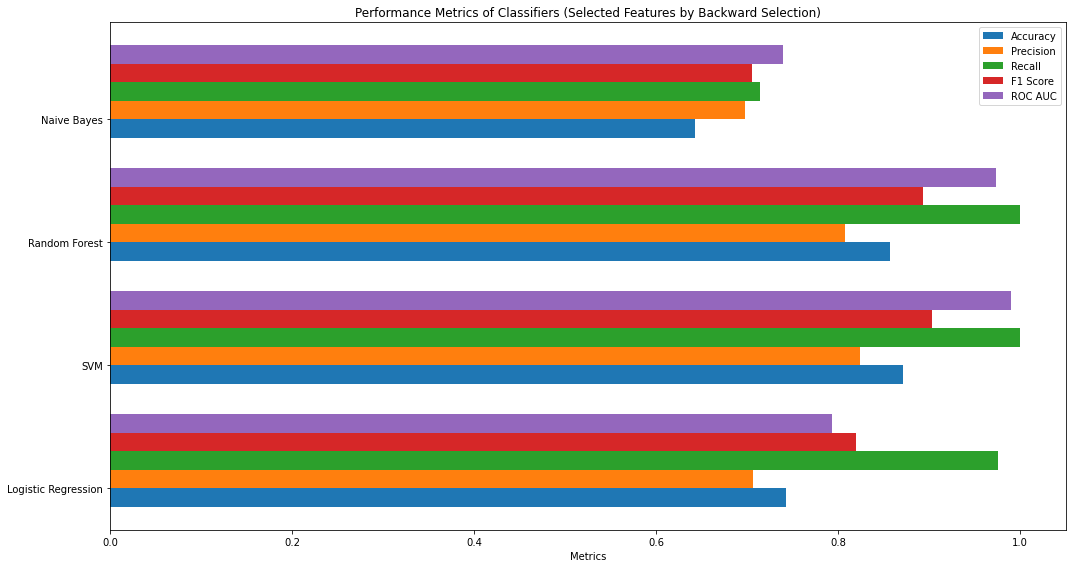

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.742857   0.706897  0.976190  0.820000  0.793367
1                  SVM  0.871429   0.823529  1.000000  0.903226  0.989796
2        Random Forest  0.857143   0.807692  1.000000  0.893617  0.973214
3          Naive Bayes  0.642857   0.697674  0.714286  0.705882  0.739796

In [13]:
# Initialize dictionary to store performance metrics for selected features by Backward Selection
backwardsbs = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Extract the training and testing sets for the selected features
X_train_backward = X_train[selected_features_names_backward]
X_test_backward = X_test[selected_features_names_backward]

# Train classifiers and evaluate performance using selected features
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_backward, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_backward)
    y_prob = clf.predict_proba(X_test_backward)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Store performance metrics
    backwardsbs['Classifier'].append(name)
    backwardsbs['Accuracy'].append(accuracy)
    backwardsbs['Precision'].append(precision)
    backwardsbs['Recall'].append(recall)
    backwardsbs['F1 Score'].append(f1)
    backwardsbs['ROC AUC'].append(roc_auc)

# Create a DataFrame to display performance metrics for selected features
performance_df_backward = pd.DataFrame(backwardsbs)

# Plotting the performance metrics for selected features
labels = backwardsbs['Classifier']

x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(15, 8))

for i, metric in enumerate(metrics):
    ax.barh(x + i * width, backwardsbs[metric], width, label=metric)

ax.set_xlabel('Metrics')
ax.set_title('Performance Metrics of Classifiers (Selected Features by Backward Selection)')
ax.set_yticks(x + width / 2)
ax.set_yticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

# Show the performance metrics DataFrame for selected features
performance_df_backward


In [ ]:
    # SVM has the highest metrics across all categories except for ROC AUC, where Random Forest leads.
    # Random Forest and Naive Bayes also perform well, with only slightly lower metrics compared to SVM.
    # Logistic Regression performs well but has slightly lower metrics compared to the other models.